In [1]:
import numpy as np
import pandas as pd

from datetime import datetime

In [2]:
directory = 'C:/Users/geeze/Desktop/'
file = 'LA_County_Covid19_cases_deaths_date_table.csv'

df = pd.read_csv(directory+file)

In [3]:
#get rid of possibly unreliable most recent information, possibly todays information
df = df.drop(0, 'index')

In [12]:
def get_date (string):
    time = datetime.strptime(string, '%m/%d/%Y')
    
    return time

In [14]:
df['date'] = df['date_use'].apply(get_date)

In [17]:
#get total number of new cases over last 14 days as number of "active cases" if event was today
tot = 0
for i in range(14):
    i = i+1
    num = df.loc[i, 'new_case']
    tot+=num

In [24]:
#modifiers of new case numbers, multiplies number of confirmed cases to estimate pre-test probability in total pop
mods = [1, 3, 5, 10]

In [19]:
#roughly La county population
la_pop= 10*10**6

In [25]:
#pre test probability
rate = tot/la_pop

#modified rates
rates = [rate*m for m in mods]

In [34]:
#group size
sizes = np.linspace(1,20,20)

In [42]:
def prob_nobody_has (rate, mod, group_size):
    
    return (1-(rate*mod))**group_size

In [49]:
full = []
for s in sizes:
    data = {mod: prob_nobody_has(rate, mod, s) for mod in mods}
    full.append(pd.DataFrame(data, np.array([s])))

In [52]:
df = pd.concat(full)

In [59]:
df.index.name = 'group_size'
df.rename_axis("rate_mult", axis="columns", inplace=True)

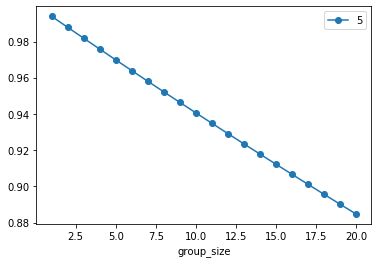

In [67]:
df.reset_index().plot(x='group_size', y=5, marker='o')